In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import seaborn as sns
miami = pd.read_csv('C:/Users/samik/Documents/econometrics/miami-housing.csv')#
miami

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


In [2]:
miami['SALE_PRC_lg'] = miami.apply(lambda row: math.log1p(row.SALE_PRC), axis=1)
miami['CNTR_DIST_lg'] = miami.apply(lambda row: math.log1p(row.CNTR_DIST), axis=1)
miami['HWY_DIST_lg'] = miami.apply(lambda row: math.log1p(row.HWY_DIST), axis=1)
miami['RAIL_DIST_lg'] = miami.apply(lambda row: math.log1p(row.RAIL_DIST), axis=1)
miami['age_lg'] = miami.apply(lambda row: math.log1p(row.age), axis=1)
miami['price_per_foot'] = miami.apply(lambda row: math.log1p(row.SALE_PRC/row.LND_SQFOOT), axis=1)

In [3]:
#very simple regression using python
simple = ols("SALE_PRC_lg ~ CNTR_DIST", data = miami).fit()
print(simple.summary())

                            OLS Regression Results                            
Dep. Variable:            SALE_PRC_lg   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     802.3
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.17e-171
Time:                        09:13:31   Log-Likelihood:                -11493.
No. Observations:               13932   AIC:                         2.299e+04
Df Residuals:                   13930   BIC:                         2.301e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9945      0.011   1176.076      0.0

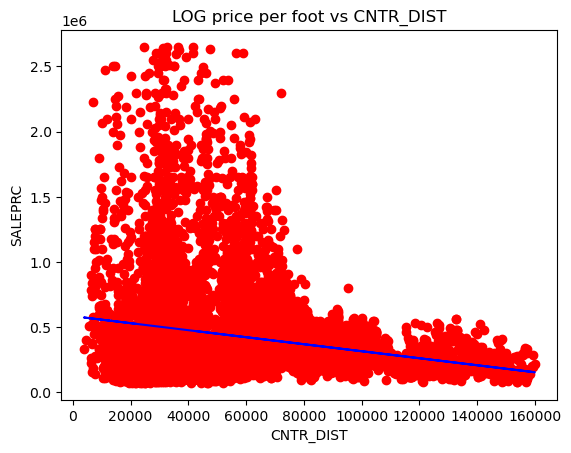

In [4]:
X=miami[['CNTR_DIST']]
Y=miami[['SALE_PRC']]

regressor = LinearRegression()
regressor.fit(X,Y)
y_pred = regressor.predict(X)
plt.scatter(X, Y, color = 'red', )
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('LOG price per foot vs CNTR_DIST')
plt.xlabel('CNTR_DIST')
plt.ylabel('SALEPRC')
plt.show()

<AxesSubplot:xlabel='CNTR_DIST', ylabel='SALE_PRC'>

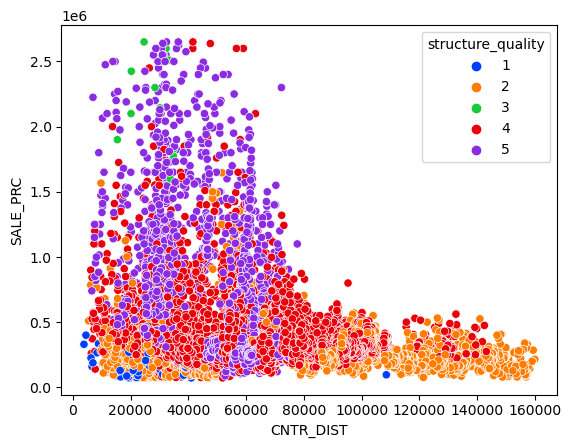

In [18]:
sns.scatterplot(data=miami, x='CNTR_DIST', y='SALE_PRC', hue='structure_quality', palette='bright')

<AxesSubplot:xlabel='CNTR_DIST', ylabel='SALE_PRC'>

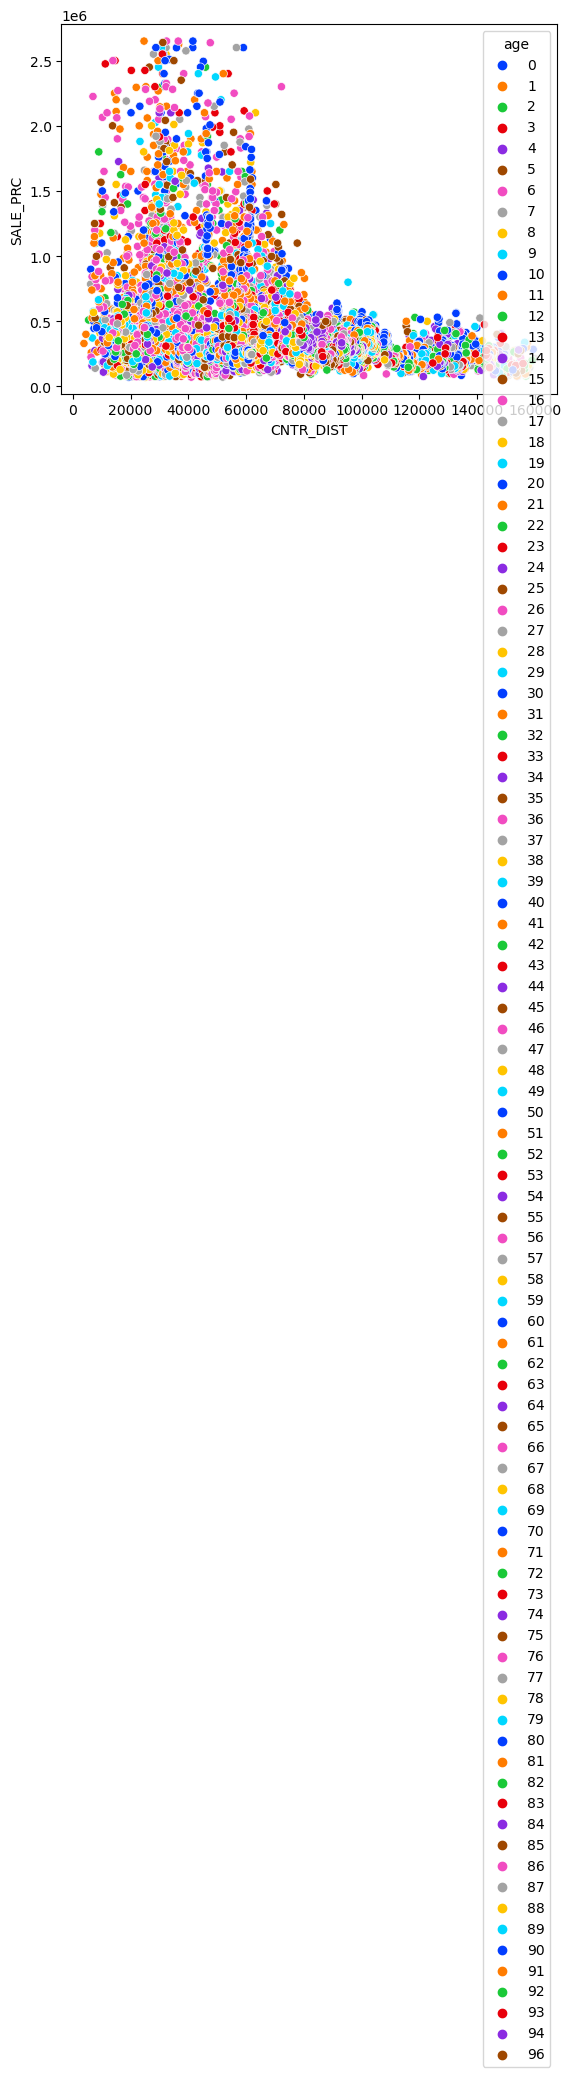

In [11]:
sns.scatterplot(data=miami, x='CNTR_DIST', y='SALE_PRC', hue='age', palette="bright")

In [6]:
#very simple regression using python
simple = ols("price_per_foot ~ CNTR_DIST + HWY_DIST + RAIL_DIST + age", data = miami).fit()
print(simple.summary())

                            OLS Regression Results                            
Dep. Variable:         price_per_foot   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     1650.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:13:33   Log-Likelihood:                -9230.1
No. Observations:               13932   AIC:                         1.847e+04
Df Residuals:                   13927   BIC:                         1.851e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7151      0.017    281.052      0.0

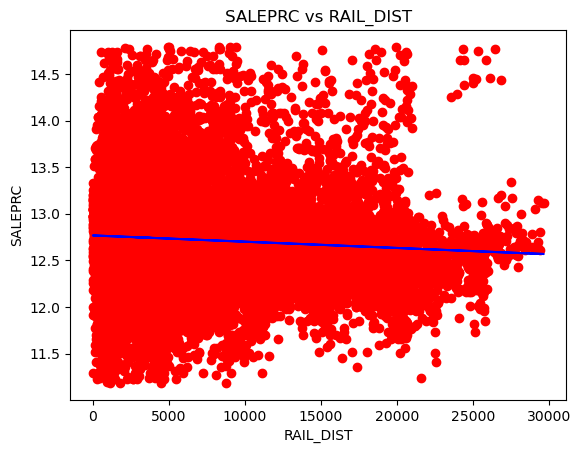

In [7]:
X=miami[['RAIL_DIST']]
Y=miami[['SALE_PRC_lg']]

regressor = LinearRegression()
regressor.fit(X,Y)
y_pred = regressor.predict(X)
plt.scatter(X, Y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('SALEPRC vs RAIL_DIST')
plt.xlabel('RAIL_DIST')
plt.ylabel('SALEPRC')
plt.show()